# Анализ данных на Python

*Алла Тамбовцева, НИУ ВШЭ*

## Операции с датафреймами Pandas. Введение в визуализацию

### Загрузка данных

Импортируем библиотеку `pandas` и загрузим данные из файла `Salaries.csv`, с которым мы работали в прошлый раз.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Salaries.csv")
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


Напоминание о переменных:

* `rank`: должность;
* `discipline`: тип преподаваемой дисциплины (A – теоретическая, B – практическая);
* `yrs.since.phd`: число лет с момента получения степени PhD;
* `yrs.service`: число лет опыта работы;
* `sex`: пол;
* `salary`: заработная плата за 9 месяцев, в долларах.

### Переименование и удаление столбцов

Избавимся от длинных названий с точкой – переименуем столбцы `yrs.service` и `yrs.since.phd`. Воспользуемся методом `.rename()` и поместим в него словарь, где ключами являются старые названия столбцов, а значениями – новые:

In [3]:
df.rename({"yrs.since.phd" : "phd", "yrs.service" : "service"})
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


Как можно заметить, с `df` никаких изменений не произошло. Почему? Метод `.rename()` по умолчанию работает со строками, а не со столбцами, поэтому здесь нужно явно указать название аргумента `columns`:

In [4]:
df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"})
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


Забавно, но изменений всё ещё нет. Это связано с тем, что, несмотря на то, что тип `DataFrame` является изменяемым, многие методы на датафреймах по умолчанию работают «в безопасном режиме», то есть возвращают изменённую копию датафрейма, не изменяя оригинал. Чтобы сохранить изменения без переприсваивания через `=`, добавим аргумент `inplace = True`:

In [5]:
# аналог менее изящного 
# df = df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"})

df.rename(columns = {"yrs.since.phd" : "phd", "yrs.service" : "service"}, inplace = True)
df.head()

,Unnamed: 0,rank,discipline,phd,service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


Изменения в `df` сохранились. Теперь удалим лишний столбец `Unnamed: 0` с номером строки. Метод `.drop()` работает по схожей схеме, по умолчанию удаляет строки, для работы со столбцами указываем в аргументе `columns` список названий столбцов для удаления:

In [6]:
# и снова inplace = True

df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


### Выбор строк и столбцов по индексу/названию

В `pandas` на датафреймах определены два метода:
    
* метод `iloc` для выбора строк/столбцов по индексам (*index location*);
* метод `loc` для выбора строк/столбцов по названиям (*location*).

Начнём с `iloc`. Выберем значение из отдельной ячейки, указав индекс строки и столбца:

In [7]:
# ячейка во второй строке, третьем столбце

df.iloc[1, 2]

20

Так как датафреймы можно изменять, метод `.iloc` можно сочетать с присваиваниям для замены элементов или целых фрагментов таблицы. Изменим значение в выбранной ячейке на 21:

In [8]:
df.iloc[1, 2] = 21
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


Если мы хотим выбрать одну строку по её индексу, на втором месте в квадратных скобках можно поставить полный срез, срез всех столбцов сразу:

In [9]:
# строка с индексом 1
df.iloc[1, :]

rank            Prof
discipline         B
phd               21
service           16
sex             Male
salary        173200
Name: 1, dtype: object

Обратите внимание: из-за наличия строковых значений в строке, мы получили объект `pandas Series` с типом данных `object`, строковый тип всегда сильнее числового и вытесняет его. Что интересно, если из этой последовательности `Series` извлечь отдельные значения, они будут правильного типа (как в исходном датафрейме):

In [10]:
# выбор столбца rank из выбранной строки
# тип string

df.iloc[1, :]["rank"]

'Prof'

In [11]:
# выбор столбца salary из выбранной строки
# тип integer

df.iloc[1, :]["salary"]

173200

Выбрать отдельный столбец по индексу можно аналогичным образом, только теперь полный срез, срез всех строк, будет на первом месте в квадратных скобках:

In [12]:
# столбец с индексом 4
df.iloc[:, 4]

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
392    Male
393    Male
394    Male
395    Male
396    Male
Name: sex, Length: 397, dtype: object

Полезная деталь: если по каким-то причинам выбор элементов производится по индексам, а названия у столбцов/строк все-таки есть, эти названия можно извлечь отдельно (например, для проверки того, что выбрано то, что нужно):

In [13]:
# атрибут name – название столбца

df.iloc[:, 4].name

'sex'

Если внутри `.iloc` указывать не полные срезы, а срезы с фиксированными индексами, правый конец среза исключается, поскольку работа идет с обычными числовыми индексами (как в списках и кортежах):

In [14]:
# строки 0, 1, 2, 3, 4
# столбцы 2, 3, 4

df.iloc[0:5, 2:5]

,phd,service,sex
0,19,18,Male
1,21,16,Male
2,4,3,Male
3,45,39,Male
4,40,41,Male


Теперь проделаем похожие операции с методом `.loc`. Так как в нашем случае названия строк совпадают с числовыми индексами этих строк, строки, в любом случае, будут вызываться через индексы. Выберем значение в строке с индексом 3 и столбце `phd`:

In [15]:
df.loc[3, "phd"]

45

Выберем всю строку 3:

In [16]:
df.loc[3, :]

rank            Prof
discipline         B
phd               45
service           39
sex             Male
salary        115000
Name: 3, dtype: object

Выберем столбец по названию:

In [17]:
# df["service"] как вариант без loc

df.loc[:, "service"]

0      18
1      16
2       3
3      39
4      41
       ..
392    30
393    19
394    25
395    15
396     4
Name: service, Length: 397, dtype: int64

А вот срезы внутри `.loc` имеют свои особенности: правый конец среза не исключается, даже если при выборе используются числовые индексы. В этом отличие этих срезов от обычных срезов в Python и срезов внутри `.iloc`:

In [18]:
# столбцы phd, service, sex
df.loc[:, "phd" : "sex"]

,phd,service,sex
0,19,18,Male
1,21,16,Male
2,4,3,Male
3,45,39,Male
4,40,41,Male
...,...,...,...
392,33,30,Male
393,31,19,Male
394,42,25,Male
395,25,15,Male


In [19]:
# строки 0, 1, 2, 3, 4, 5
# столбцы phd, service, sex

df.loc[0:5, "phd" : "sex"]

,phd,service,sex
0,19,18,Male
1,21,16,Male
2,4,3,Male
3,45,39,Male
4,40,41,Male
5,6,6,Male


### Фильтрация строк

Часто при работе с датафреймом нас не интересует выбор отдельных строк по названию или номеру, а интересует фильтрация наблюдений – выбор строк датафрейма, которые удовлетворяют определенному условию. Для этого интересующее нас условие необходимо указать в квадратных скобках. Обычные условия мы уже обсуждали, посмотрим на несколько примеров:

In [20]:
# стаж более 30 лет
# сотрудники женского пола

df[(df["service"] > 20) & (df["sex"] == "Female")]

,rank,discipline,phd,service,sex,salary
19,Prof,A,39,36,Female,137000
48,Prof,B,25,25,Female,140096
123,AssocProf,A,25,22,Female,62884
148,Prof,B,36,26,Female,144651
230,Prof,A,29,27,Female,91000
231,AssocProf,A,26,24,Female,73300


In [21]:
# профессора или доценты

df[(df["rank"] == "Prof") | (df["rank"] == "AssocProf")]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738


Однако иногда для формулировки условий стандартных операторов (`&`, `|`, `^`) недостаточно. Чтобы не писать длинную последовательность с `|`, можно проверить, входят ли значения в некотором столбце в список, с помощью метода `.isin()`:

In [22]:
# isin() возвращает True/False

df[df["rank"].isin(["Prof", "AssocProf"])]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
...,...,...,...,...,...,...
391,Prof,A,30,19,Male,151292
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738


Метод `.isin()` выполняет поиск точных соответствий (строгое совпадение с каким-нибудь элементом внутри списка), для проверки частичных совпадений можно воспользоваться методами из модуля `str` (набор методов на строках внутри `pandas`). Так, в `str` есть метод `.contains()`, который проверяет, содержит ли текст в ячейке некоторую подстроку:

In [23]:
# в нашем случае все строки, везде есть Prof

df[df["rank"].str.contains("Prof")]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


Можно попросить не учитывать регистр:

In [24]:
# case = False
# prof с буквами любого регистра

df[df["rank"].str.contains("prof", case = False)]

,rank,discipline,phd,service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,21,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


При этом методы внутри `str` по умолчанию поддерживают работу с регулярными выражениями. Если эту поддержку не выключать, можно сразу внутри строки писать нужный шаблон:

In [25]:
# ловим AsstProf и AssocProf
# есть часть с As, далее сколько угодно символов,
# заканчивается на f

df[df["rank"].str.contains("As.+f$")]

,rank,discipline,phd,service,sex,salary
2,AsstProf,B,4,3,Male,79750
5,AssocProf,B,6,6,Male,97000
10,AssocProf,B,12,8,Male,119800
11,AsstProf,B,7,2,Male,79800
12,AsstProf,B,1,1,Male,77700
...,...,...,...,...,...,...
377,AsstProf,A,6,3,Male,77081
379,AssocProf,A,11,8,Male,104121
380,AsstProf,A,8,3,Male,75996
382,AssocProf,A,8,5,Male,86895


В целом, если вы уверенно владеете регулярными выражениями, для поиска по частичным совпадениям достаточно метода `.contains()`, но, как частные случаи, в этом наборе методов есть функции `.startswith()` и `.endswith()`, которые проверяют, начинается ли/заканчивается ли строка на определённую последовательность символов.

### Добавление новых столбцов

Если нам нужно добавить столбец из одинаковых значений (например, указание на версию датафрейма), создавать список определённой длины необязательно, Pandas умеет «растягивать» значение на все ячейки:

In [26]:
# одинаковые значения

df["version"] = "v.01"
df.head()

,rank,discipline,phd,service,sex,salary,version
0,Prof,B,19,18,Male,139750,v.01
1,Prof,B,21,16,Male,173200,v.01
2,AsstProf,B,4,3,Male,79750,v.01
3,Prof,B,45,39,Male,115000,v.01
4,Prof,B,40,41,Male,141500,v.01


Если нам нужно создать новый столбец на основе старого с помощью базовых операций (умножение, деление, возведение в степень, сложение двух столбцов), никаких специальных функций не требуется, можем пользоваться тем, что операции на типе `pandas Series` векторизованы, как на массивах:

In [27]:
# делим столбец на 1000

df["salary_th"] = df["salary"] / 1000
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th
0,Prof,B,19,18,Male,139750,v.01,139.75
1,Prof,B,21,16,Male,173200,v.01,173.20
2,AsstProf,B,4,3,Male,79750,v.01,79.75
3,Prof,B,45,39,Male,115000,v.01,115.00
4,Prof,B,40,41,Male,141500,v.01,141.50


Если нам нужно добавить бинарный столбец на основе простого условия, можем проверить это условие с помощью базовых операторов:

In [28]:
df["sex"] == "Female"

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Name: sex, Length: 397, dtype: bool

И преобразовать тип полученного столбца в целочисленный:

In [29]:
# бинарный столбец с полом сотрудника

df["female"] = (df["sex"] == "Female").astype(int)
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female
0,Prof,B,19,18,Male,139750,v.01,139.75,0
1,Prof,B,21,16,Male,173200,v.01,173.20,0
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0
3,Prof,B,45,39,Male,115000,v.01,115.00,0
4,Prof,B,40,41,Male,141500,v.01,141.50,0


Можем проверить, что в столбце есть как 0, так и 1. Метод `.value_counts()` построит таблицу частот:

In [30]:
# точнее, это pandas Series с частотами

df["female"].value_counts()

0    358
1     39
Name: female, dtype: int64

Если нам нужен столбец с двумя значениями, но эти значения не 0 и 1, можем написать свою простую lambda-функцию для перекодировки и применить её к уже имеющемуся столбцу через метод `.apply()`:

In [31]:
# столбец с двумя значениями

df["course"] = df["discipline"].apply(lambda x: "Theory" if x == "A" else "Practice")
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice


Метод `.apply()` – аналог базового `map()`, только ещё более эффективный при работе с датафреймами. Он применяет написанную функцию к каждой ячейке в столбце (хотя его можно написать и для строк тоже, есть аргумент `axis`).

Конечно, если функция более объёмная, её лучше задать отдельно, а в `.apply()` подставить её название. Перекодируем значения должностей:

* `Prof` в 1;
* `AssocProf` в 2;
* `AsstProf` в 3.

In [32]:
# пишем функцию и применяем ее
def get_num_rank(x):
    if x == "Prof":
        y = 1
    elif x == "AssocProf":
        y = 2
    elif x == "AsstProf":
        y = 3
    else:
        y = None
    return y

df["rank_num"] = df["rank"].apply(get_num_rank)
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1


Представленный выше способ – универсальный, он подойдёт для действительно больших функций (для обработки текста, например), а в нашем случае столбец с перекодированными должностями можно было создать ещё проще, вообще без функций. В Pandas есть метод  `.map()`, которая умеет выполнять замену значений, заданную с помощью словаря (ключи – старые значения, значения – новые, похоже на `.rename()` по своей логике):

In [33]:
# создаем словарь соответствий и задействуем

D = {"Prof" : 1, "AssocProf" : 2, "AsstProf" : 3}
df["rank_new"] = df["rank"].map(D)

df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num,rank_new
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3,3
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1,1


И последнее дополнение. В задачах, связанных с прикладным анализом данных, часто возникает необходимость представить качественную (текстовую) информацию в числовой форме. Для этого часто прибегают к процедуре создания фиктивных переменных (дамми-переменных), которая также называется **one-hot encoding**. В ходе этой процедуры для каждого уникального `x` в столбце создаётся новый бинарный столбец, где 1 ставится, если значение в строке равно `x`, и 0 – иначе. Для примера создадим набор дамми-переменных для должности:

In [34]:
# первый и второй сотрудник – профессор,
# третий – преподаватель

new = pd.get_dummies(df["rank"])
new.head()

,AssocProf,AsstProf,Prof
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


Единственное, стоит учесть, что функция `get_dummies()` создаёт новый датафрейм с бинарными столбцами, а не добавляет их в старый. Поэтому исходный датафрейм нужно склеить с новым. Воспользуемся функцией `concat()` и подадим этой функции на вход список датафреймов, которые необходимо склеить:

In [35]:
df = pd.concat([df, new], axis = 1)
df.head()

,rank,discipline,phd,service,sex,salary,version,salary_th,female,course,rank_num,rank_new,AssocProf,AsstProf,Prof
0,Prof,B,19,18,Male,139750,v.01,139.75,0,Practice,1,1,0,0,1
1,Prof,B,21,16,Male,173200,v.01,173.20,0,Practice,1,1,0,0,1
2,AsstProf,B,4,3,Male,79750,v.01,79.75,0,Practice,3,3,0,1,0
3,Prof,B,45,39,Male,115000,v.01,115.00,0,Practice,1,1,0,0,1
4,Prof,B,40,41,Male,141500,v.01,141.50,0,Practice,1,1,0,0,1


По умолчанию функция `concat()` склеивает датафреймы по строкам (доклеивает новый датафрейм снизу), значение аргумента `axis` равно 0. Нам же нужно было склеить датафреймы по столбцам (доклить `new` справа от `df`), поэтому мы изменили ось `axis` на 1. Функция `concat()` объединяет датафреймы «как есть», просто присоединяя одну таблицу к другой снизу или справа, для более продвинутого объединения нужен метод `.merge()`. Он реализует разные варианты объединений по какому-то столбцу, например, с id, по аналогии с операциями над базами данных (`INNER JOIN`, `OUTER JOIN` и подобные).

### Группировка и агрегирование

Рассмотрим группировку строк в датафрейме по фиксированному признаку. Для группировки используется метод `.groupby()`, в качестве аргумента указывается столбец, по которому группируем:

In [36]:
df.groupby("sex")

Этот метод возвращает скрытый объект специального типа, он временно хранится в какой-то ячейке памяти. Внутри этот объект похож на список кортежей, где на первом месте указаны значения показателя группировки, а на втором – датафрейм из строк, соответствующих этому значению.

In [ ]:
#print(*df.groupby("sex"))

Так, если раскомментировать код выше, мы получим пары:

*  `female` и датафрейм с отфильтрованными строками, соответствующими сотрудникам женского пола;
* `male` и датафрейм с отфильтрованными строками, соответствующими сотрудникам мужского пола.

Если групп много (а не две, как здесь), этот результат удобно использовать для выгрузки данных по группам. Сделаем множественный перебор в `for` и сохраним датафрейм по каждой группе в CSV-файл:

In [37]:
for name, data in df.groupby("sex"):
    data.to_csv(name + ".csv")

Что важно, объект, возвращаемый `.groupby()`, не просто список пар. Это особый тип данных в Pandas, из которого можно извлекать столбцы по названиям, как в датафреймах. Так, если напишем следующий код:

In [38]:
df.groupby("sex")["service"].mean()

sex
Female    11.564103
Male      18.273743
Name: service, dtype: float64

Pandas выберет из каждого датафрейма, соответствующего группе, столбец `service` и вычислит по нему среднее. Другими словами, можно сочетать группировку и агрегирование. 

Выберем два столбца, сравним средний стаж и зарплату мужчин и женщин:

In [39]:
df.groupby("sex")[["service", "salary"]].mean()

,service,salary
sex,,
Female,11.564103,101002.410256
Male,18.273743,115090.418994


Выполним группировку по двум показателям сразу – сгруппируем строки по полу и типу дисциплины:

In [40]:
# внутри groupby() список
df.groupby(["sex", "discipline"])[["service", "salary"]].mean()

service         salary
sex    discipline                          
Female A           11.444444   89064.944444
       B           11.666667  111234.523810
Male   A           20.889571  110699.981595
       B           16.087179  118760.374359

Что удобно, за один раз можно получить сразу несколько описательных статистик сразу:

In [41]:
df.groupby(["sex", "discipline"])[["service", "salary"]].describe()

service                                                    \
                    count       mean        std  min  25%   50%   75%   max   
sex    discipline                                                             
Female A             18.0  11.444444  10.478113  0.0  3.0   8.0  18.0  36.0   
       B             21.0  11.666667   7.364328  0.0  6.0  10.0  17.0  26.0   
Male   A            163.0  20.889571  13.690587  0.0  8.0  19.0  30.5  57.0   
       B            195.0  16.087179  12.443588  0.0  5.5  15.0  23.0  60.0   

                  salary                                                 \
                   count           mean           std      min      25%   
sex    discipline                                                         
Female A            18.0   89064.944444  21638.580595  62884.0  73350.0   
       B            21.0  111234.523810  25367.239751  71065.0  97032.0   
Male   A           163.0  110699.981595  30663.119265  57800.0  87347.5   
       B           195.0  118760.374359  29831.315448  67559.0  94731.5   

                                                 
                        50%       75%       max  
sex    discipline                                
Female A            78000.0  108484.5  137000.0  
       B           105450.0  127512.0  161101.0  
Male   A           105260.0  127950.0  205500.0  
       B           113600.0  141318.0  231545.0

Если нас интересует набор определенных функций, в не готовый выбор тех, что в `.describe()`, пригодится метод `.agg()`, сокращение от *aggregate*:

In [42]:
df.groupby(["sex", "discipline"])[["service", "salary"]].agg(["mean", "median"])

service                salary          
                        mean median           mean    median
sex    discipline                                           
Female A           11.444444    8.0   89064.944444   78000.0
       B           11.666667   10.0  111234.523810  105450.0
Male   A           20.889571   19.0  110699.981595  105260.0
       B           16.087179   15.0  118760.374359  113600.0

Внутри `.agg()` можно указать перечень функций в виде списка. Если применяемые функции уже существуют в Pandas, их названия указываются в кавычках. Выше мы запросили одновременно среднее и медиану, можем добавить число заполненных ячеек (`count`):

In [43]:
df.groupby(["sex", "discipline"])[["service", "salary"]].agg(["count", "mean", "median"])

service                   salary                         
                    count       mean median  count           mean    median
sex    discipline                                                          
Female A               18  11.444444    8.0     18   89064.944444   78000.0
       B               21  11.666667   10.0     21  111234.523810  105450.0
Male   A              163  20.889571   19.0    163  110699.981595  105260.0
       B              195  16.087179   15.0    195  118760.374359  113600.0

Метод `.agg()` довольно гибкий. Иногда возникает необходимость для одних данных использовать одни описательные статистики, а для других – другие. Так, если медиана и среднее сильно различаются между собой, это свидетельствует о наличии нехарактерных значений (если среднее сильно больше медианы, нетипично больших, если среднее сильно меньше медианы, нетипично маленьких). А при наличии нехарактерных значений среднее арифметическое уже не является показательным, это неустойчивая оценка среднего. 

В нашем случае сильных различий не наблюдается, но давайте для заработной платы посчитаем медиану, а для стажа – среднее. Запишем это в виде словаря (ключи – столбцы, значения – функции, которые нужно к этим столбцам применить):

In [44]:
df.groupby("discipline").agg({"salary" : "median", 
                              "service" : "mean"})

,salary,service
discipline,,
A,104350.0,19.950276
B,113018.5,15.657407


И, напоследок, ещё одно применение метода `.agg()`. Внутри этого метода можно указать свою функцию для агрегирования. Например, в Pandas нет готовой функции для вычисления размаха (максимальное значение минус минимальное), поэтому её можно написать самостоятельно:

In [45]:
df.groupby("discipline")["salary"].agg(lambda x: max(x) - min(x))

discipline
A    147700
B    163986
Name: salary, dtype: int64

Если бы функция была более сложной, её можно было бы написать через `def`, а в `.agg()` просто указать её название, причём уже без кавычек:

In [46]:
def my_range(x):
    return max(x) - min(x)

df.groupby("discipline")["salary"].agg(my_range)

discipline
A    147700
B    163986
Name: salary, dtype: int64

### Немного визуализации: гистограмма и ящик с усами

Если нам нужно построить простую гистограмму или ящик с усами без сложных настроек, можно воспользоваться графическими возможностями внутри самой библиотеки Pandas, она включает в себя модуль `pyplot` для отрисовки графиков. Для построения гистограммы к датафрейму нужно применить метод `.hist()`, а в качестве аргумента указать название столбца, для которого её строим:

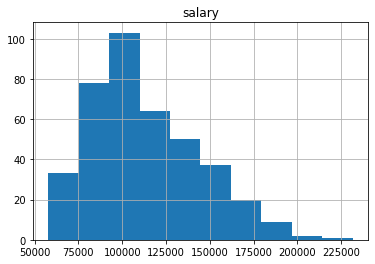

In [48]:
df.hist("salary");

Точка с запятой в конце строки с кодом для построения графиков скрывает вспомогательные объекты, которые создаются для отрисовки. Если мы не поставим её, мы увидим помимо графика массив с объектом `AxesSubplot` внутри:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e850490>]],
      dtype=object)

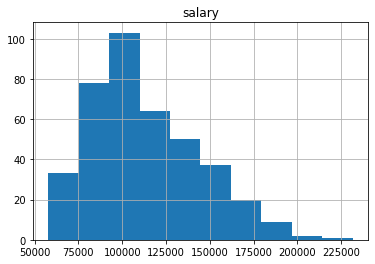

In [49]:
# внутри AxesSubplot оси с необходимыми линиями
df.hist("salary")

Что содержательного можно сказать о полученной гистограмме? 

1. Чаще всего можно встретить сотрудников с заработной платой в окрестности 100000 долларов (суммарная зарплата за 9 месяцев).

2. Распределение заработной платы не является симметричным, оно скошено вправо (справа длинный «хвост»), что свидетельствует о том, что в выборке есть нетипично большие значения. Так и есть – есть несколько значений в окрестности 200000 долларов. 

Проверим второе утверждение – построим ящик с усами. Логика работы та же, только теперь нам нужен метод `.boxplot()`:

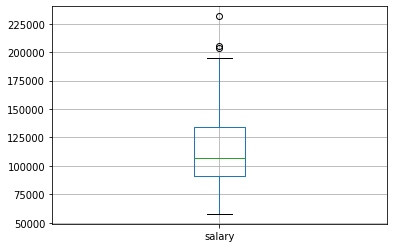

In [50]:
df.boxplot("salary");

Нижняя и верхняя границы самого ящика – нижний и верхний квартили, внутри ящика отмечена медиана. Снизу нетипичных значений нет, поэтому нижний ус графика соответствует минимальному значению. А вот сверху нетипичные значения есть, поэтому верхний ус соответствует максимальному значению среди типичных, сами выбросы отмечены точками. 

Настройка параметров у ящика с усами выглядит не совсем тривиально, поскольку он состоит из множества линий (границы ящика, медиана, усы, засечки на усах), поэтому вернемся к гистограмме и посмотрим на дополнительные аргументы. Изменим цвет заливки и цвет границ столбцов:

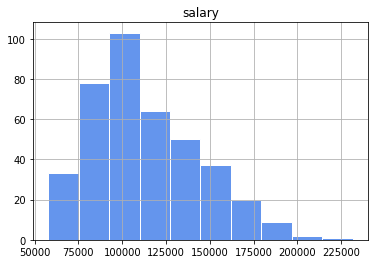

In [51]:
# color – заливка
# edgecolor – границы

df.hist("salary", color = "cornflowerblue", edgecolor = "white");

Про цвета в `matplotlib` можно почитать [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html), но вообще цвет можно задать с помощью шестнадцатеричного кода (`HEX`), который используется в веб-дизайне:

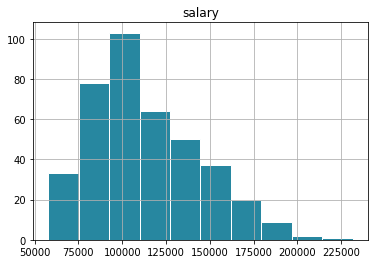

In [52]:
df.hist("salary", color = "#2787A0", edgecolor = "white");

Скорректируем число столбцов (аргумент `bins`):

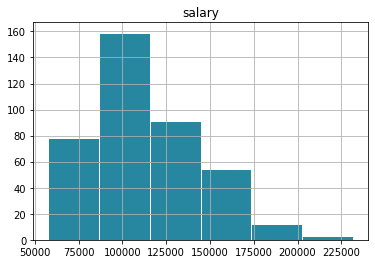

In [53]:
df.hist("salary", color = "#2787A0", edgecolor = "white", bins = 6);

Специального аргумента для регулирования ширины столбца (шага гистограммы, величины интервала группировки) в `.hist()` нет, но её можно зафиксировать, поместив в `bins` перечень границ столбцов с заданным шагом:

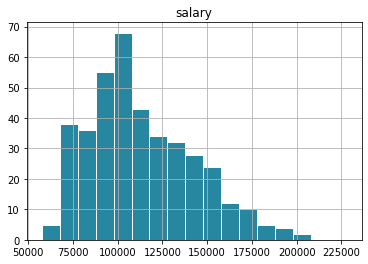

In [54]:
# считаем минимальное значение
# считаем максимальное значение + 10, чтобы не потерять правую границу

start = df["salary"].min()
end = df["salary"].max() + 10

# через range() создаем перечень границ столбцов
# от start до end с шагом 10000

df.hist("salary", 
        color = "#2787A0", 
        edgecolor = "white", 
        bins = range(start, end, 10000));

В завершение посмотрим на пример создания гистограммы более продвинутым способом, с использованием библиотеки `matplotlib` в чистом виде. Импортируем из библиотеки `matplotlib` модуль `pyplot` с сокращённым названием `plt`:

In [55]:
from matplotlib import pyplot as plt

Новые версии `matplotlib` преимущественно работают с массивами, а не с последовательностями Pandas (по крайней мере, без предупреждений и ограничений), поэтому из столбца `salary` нам нужно извлечь только значения:

In [56]:
print(df["salary"].values)

[139750 173200  79750 115000 141500  97000 175000 147765 119250 129000
 119800  79800  77700  78000 104800 117150 101000 103450 124750 137000
  89565 102580  93904 113068  74830 106294 134885  82379  77000 118223
 132261  79916 117256  80225  80225  77000 155750  86373 125196 100938
 146500  93418 101299 231545  94384 114778  98193 151768 140096  70768
 126621 108875  74692 106639 103760  83900 117704  90215 100135  75044
  90304  75243 109785 103613  68404 100522 101000  99418 111512  91412
 126320 146856 100131  92391 113398  73266 150480 193000  86100  84240
 150743 135585 144640  88825 122960 132825 152708  88400 172272 107008
  97032 105128 105631 166024 123683  84000  95611 129676 102235 106689
 133217 126933 153303 127512  83850 113543  82099  82600  81500 131205
 112429  82100  72500 104279 105000 120806 148500 117515  72500  73500
 115313 124309  97262  62884  96614  78162 155500  72500 113278  73000
  83001  76840  77500  72500 168635 136000 108262 105668  73877 152664
 10010

Сохраним их в переменную `x`:

In [57]:
x = df["salary"].values

Для создания более продвинутого графика воспользуемся функцией `subplots()` из модуля `plt`. Функция `subplots()` создает два объекта:

* «рамка» для картинки (обычно сохраняется в переменную `fig`);
* поле с осями, внутри которого строится график (обычно сохраняется в переменную `ax`).

Неформально, создавая `fig` мы резервируем место под картинку соответствующего размера, а затем проводим различные манипуляции с `ax`, чтобы внутри этого поля для картинки построить график, настроить подписи, оси и прочее. Соответственно, к `ax` мы будем применять различные методы, а по завершении работы сможем выгрузить объект `fig` в файл PNG, JPEG или PDF. Вообще функция `subplots()`, как следует из её названия, может использоваться для построения сразу нескольких графиков, но у нас пока внутри `fig` будет один.

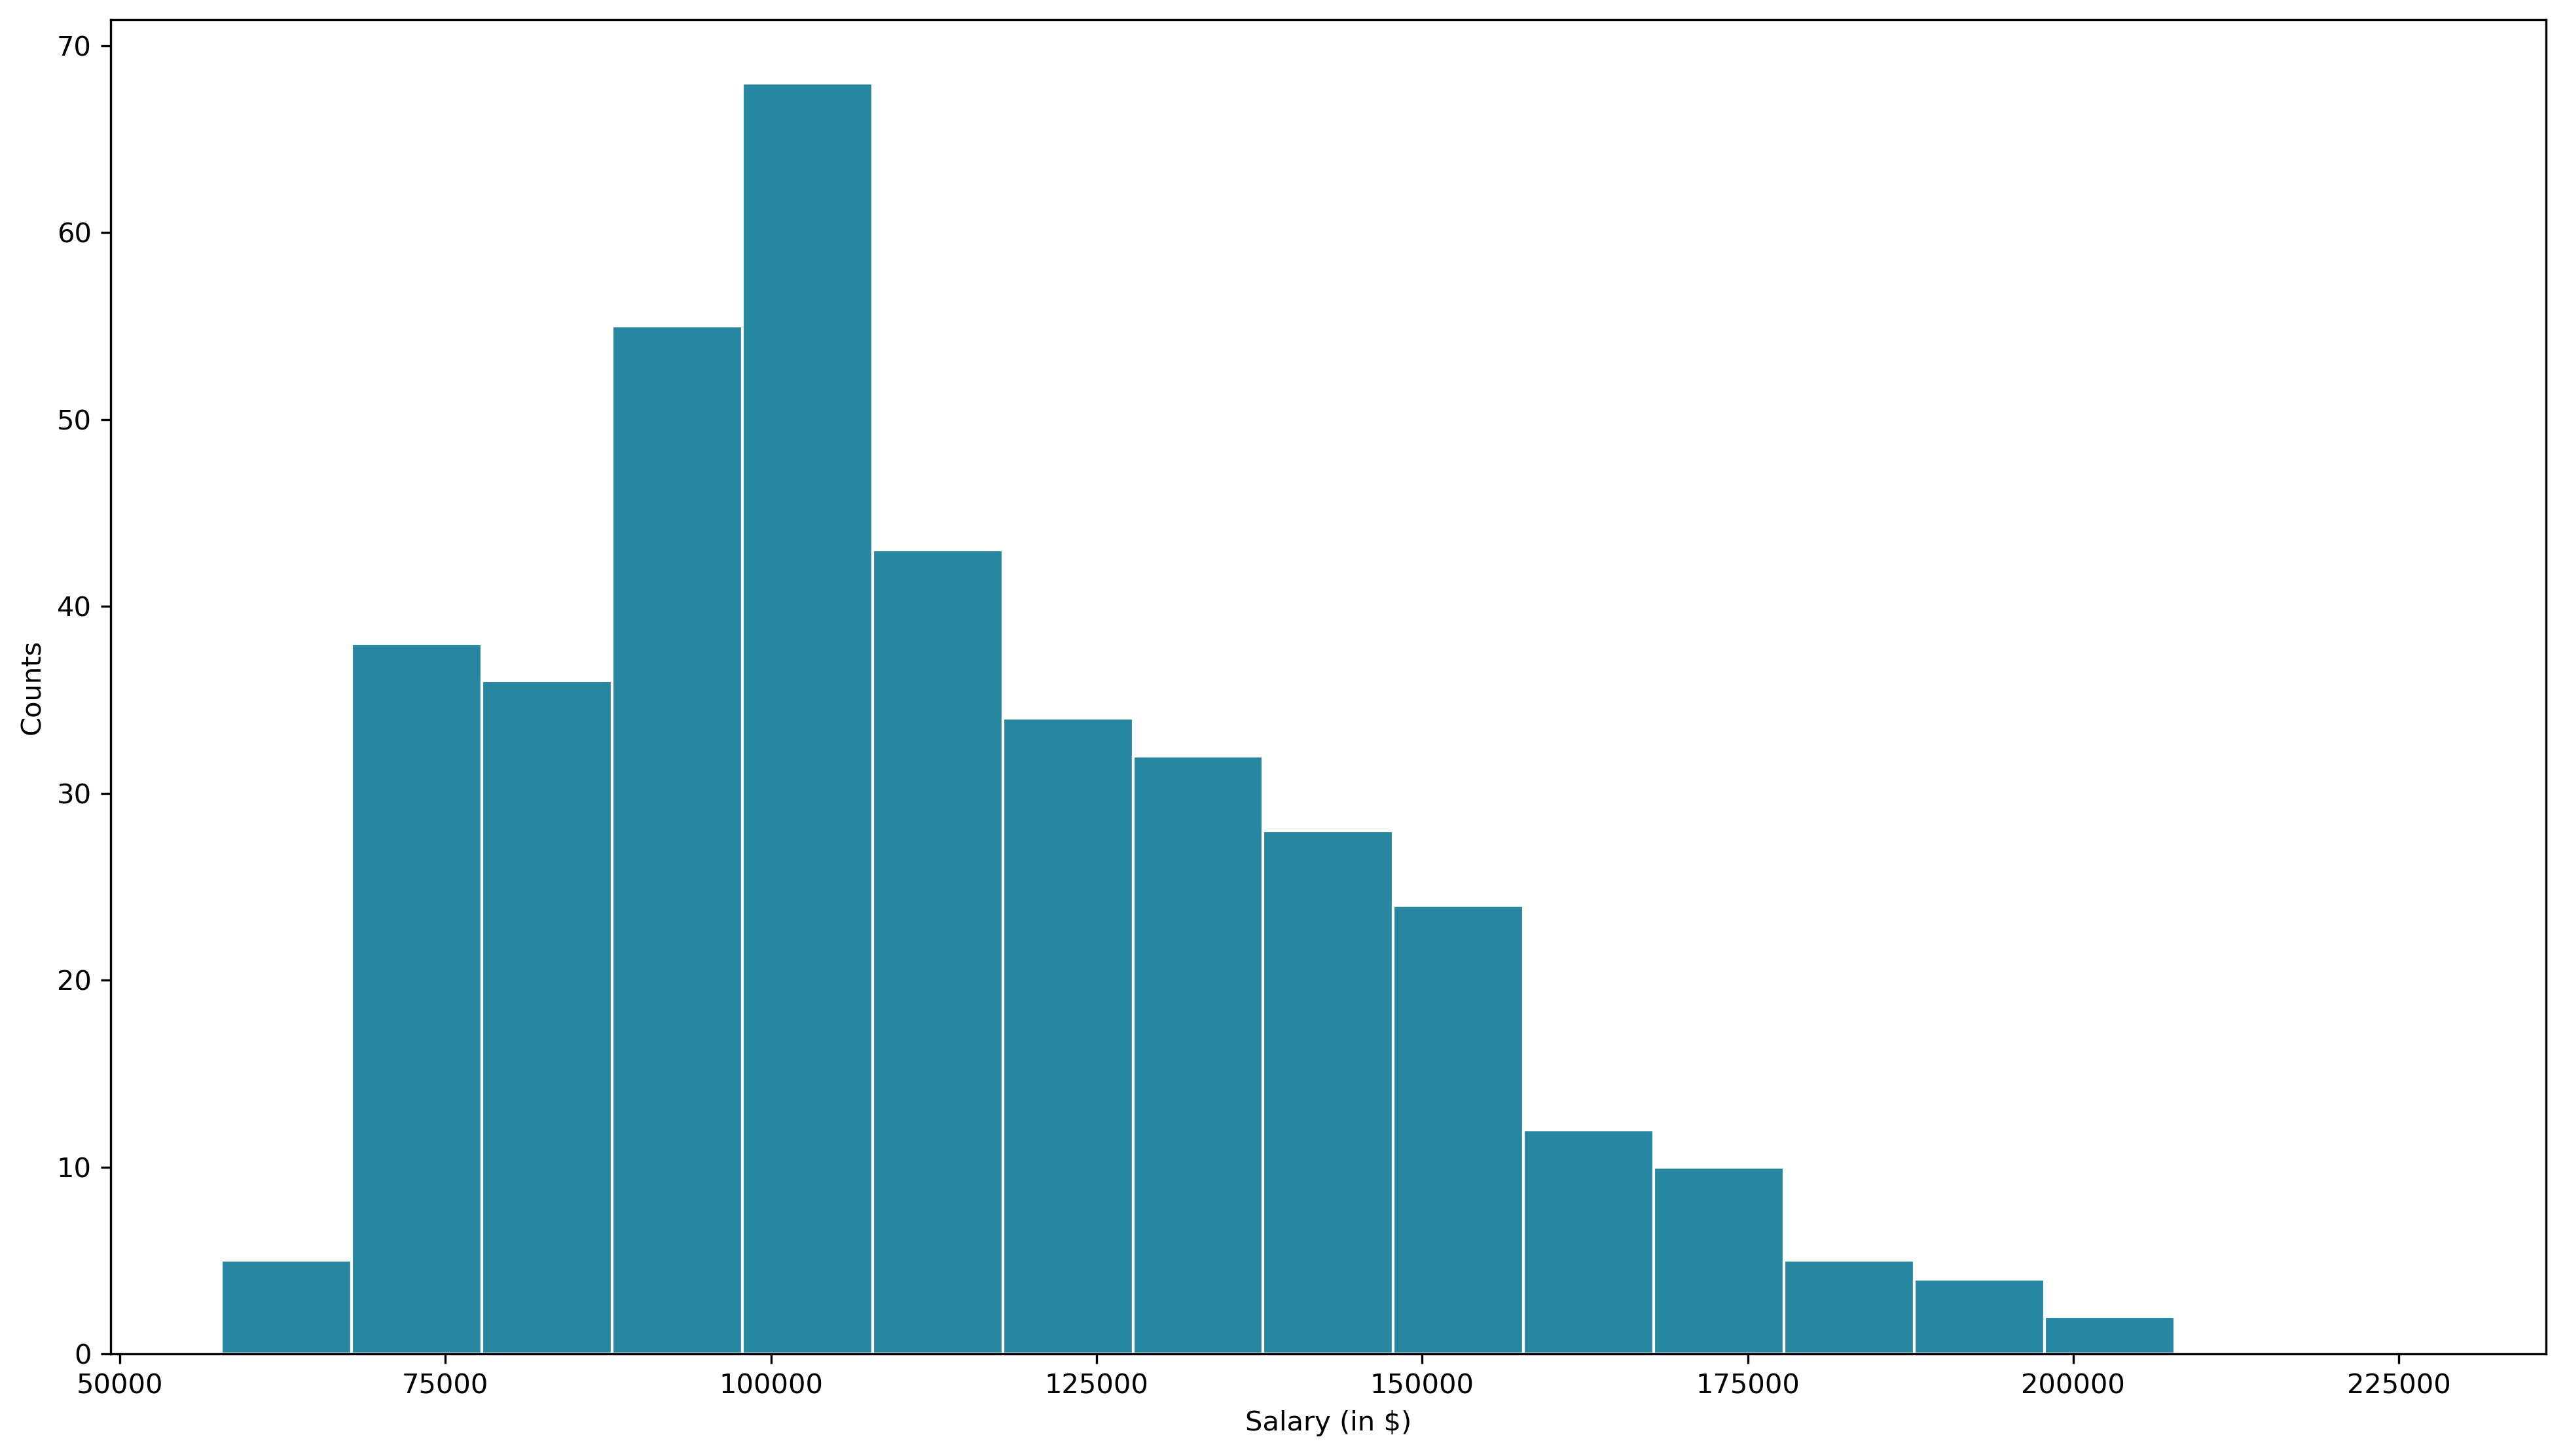

In [58]:
# figsize: размер в дюймах, делаем 16 на 9
# dpi, от dots per inch: разрешение 300 точек на дюйм
# set_xlabel: подпись по оси x
# set_ylabel: подпись по оси y

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.hist(x, 
        color = "#2787A0", 
        edgecolor = "white", 
        bins = range(start, end, 10000));

ax.set_xlabel("Salary (in $)");
ax.set_ylabel("Counts");

# выгружаем изображение fig в файл

fig.savefig("salary_hist.png")